In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
PATH2 = 'ssss.csv'
df = pd.read_csv(PATH2)
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [120]:
# basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Certification Course                                  235 non-null    object 
 1   Gender                                                235 non-null    object 
 2   Department                                            235 non-null    object 
 3   Height(CM)                                            232 non-null    float64
 4   Weight(KG)                                            232 non-null    float64
 5   10th Mark                                             235 non-null    float64
 6   12th Mark                                             234 non-null    float64
 7   college mark                                          232 non-null    float64
 8   hobbies                                               235 no

In [100]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Certification Course                                    0
Gender                                                  0
Department                                              0
Height(CM)                                              3
Weight(KG)                                              3
10th Mark                                               0
12th Mark                                               1
college mark                                            3
hobbies                                                 0
daily studing time                                      0
prefer to study in                                      0
salary expectation                                      0
Do you like your degree?                                0
willingness to pursue a career based on their degree    0
social medai & video                                    0
Travelling Time                                         0
Stress Level                                            0
Financial Stat

In [101]:
#Now we fill these null values with 0
df = df.fillna(0)

missing_values = df.isnull().sum()
missing_values

Certification Course                                    0
Gender                                                  0
Department                                              0
Height(CM)                                              0
Weight(KG)                                              0
10th Mark                                               0
12th Mark                                               0
college mark                                            0
hobbies                                                 0
daily studing time                                      0
prefer to study in                                      0
salary expectation                                      0
Do you like your degree?                                0
willingness to pursue a career based on their degree    0
social medai & video                                    0
Travelling Time                                         0
Stress Level                                            0
Financial Stat

In [102]:
#Also I think that we do not need Certification Course column, because we will not use it
df.drop(columns = 'Certification Course', inplace = True)
df.head()

,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [103]:
#Check for duplicated rows
print(df.duplicated().sum())

0


In [104]:
# Convert 'Height(CM)' and 'Weight(KG)' to numeric values if they contain any non-numeric values
df['Height(CM)'] = pd.to_numeric(df['Height(CM)'], errors='coerce')
df['Weight(KG)'] = pd.to_numeric(df['Weight(KG)'], errors='coerce')

#Also with Salary Expectation
df['salary expectation'] = pd.to_numeric(df['salary expectation'], errors='coerce')

In [105]:
#Dropping rows with extreme outliers, let's say a student can not be less than 20kg and less than 120cm and no student can expect a salary of 0 dollars
df= df[(df['Weight(KG)'] > 30) & (df['Height(CM)'] > 100) & (df['salary expectation'] >0)]


In [106]:
#Some summary statistics
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,161.231481,61.369907,76.989815,68.516343,70.459398,26278.634259
std,13.773319,14.343113,12.899846,11.648030,16.745628,57986.731519
min,106.000000,32.000000,7.400000,0.000000,0.000000,10.000000
25%,153.000000,50.000000,70.000000,60.000000,65.000000,15000.000000
50%,160.000000,60.000000,80.000000,69.350000,71.650000,20000.000000
75%,170.000000,70.000000,86.000000,75.250000,80.000000,25000.000000
max,192.000000,106.000000,98.000000,92.000000,100.000000,700000.000000


In [111]:
#Okay now lets do Exploratory Data Analysis (EDA)


# Summary statistics for numerical columns
stats = df.describe()

# Gender distribution
genders_count = df['Gender'].value_counts()

# Analyzing relationships between 10th, 12th marks, and college marks
marks_corr = df[['10th Mark', '12th Mark', 'college mark']].corr()

# Mean salary expectations by gender
mean_salary_by_gender = df.groupby('Gender')['salary expectation'].mean()

# Insights based on stress level and academic performance
stress = df.groupby('Stress Level')['college mark'].mean()



print("Summary Statistics:\n", stats)
print("\n\nGender Distribution:", genders_count)
print("\n\nCorrelation between Marks:\n", marks_corr)
print("\n\nMean Salary Expectation by Gender:\n", mean_salary_by_gender)
print("\n\nStress Level vs College Marks:\n", stress)

Summary Statistics:
        Height(CM)  Weight(KG)   10th Mark   12th Mark  college mark  \
count  216.000000  216.000000  216.000000  216.000000    216.000000   
mean   161.231481   61.369907   76.989815   68.516343     70.459398   
std     13.773319   14.343113   12.899846   11.648030     16.745628   
min    106.000000   32.000000    7.400000    0.000000      0.000000   
25%    153.000000   50.000000   70.000000   60.000000     65.000000   
50%    160.000000   60.000000   80.000000   69.350000     71.650000   
75%    170.000000   70.000000   86.000000   75.250000     80.000000   
max    192.000000  106.000000   98.000000   92.000000    100.000000   

       salary expectation  
count          216.000000  
mean         26278.634259  
std          57986.731519  
min             10.000000  
25%          15000.000000  
50%          20000.000000  
75%          25000.000000  
max         700000.000000  


Gender Distribution: Gender
Male      145
Female     71
Name: count, dtype: int64


C

In [108]:
# Grouping data by Gender and Department to find the average marks
avg_marks_by_gender_dept = df.groupby(['Gender', 'Department'])[['10th Mark', '12th Mark', 'college mark']].mean()

# Using pivot table to analyze salary expectations based on Gender and Stress Level
salary_pivot = pd.pivot_table(df, values='salary expectation', index='Gender', columns='Stress Level', aggfunc='mean')

#Merging
hobbie_rating = pd.DataFrame({
    'hobbies': ['Sports', 'Reading books', 'Cinema', 'Video Games'],
    'Rating': ['Good', 'Nice', 'Ok', 'Bad']
})

# Merge some simple rating based on hobbies, to see if the hobbie effects the student,
#by using left join we can include all of the students that are left behind
df_merged = pd.merge(df, hobbie_rating, on='hobbies', how='left')



# Displaying insights from advanced manipulation
print("Average Marks by Gender and Department:\n", avg_marks_by_gender_dept)
print("\n\nSalary Expectation Pivot Table:\n", salary_pivot)
print("\n\nMerging:\n", df_merged[['Gender', 'daily studing time', 'college mark', 'salary expectation', 'hobbies', 'Rating']].head())

Average Marks by Gender and Department:
                                      10th Mark  12th Mark  college mark
Gender Department                                                      
Female B.com Accounting and Finance  75.400000  81.416667     66.833333
       B.com ISM                     57.000000  61.000000     61.000000
       BCA                           79.287500  68.281250     77.468750
       Commerce                      84.671429  76.017857     82.314286
Male   B.com Accounting and Finance  75.125000  75.000000     69.000000
       B.com ISM                     66.190476  63.142857     59.285714
       BCA                           77.651724  64.646667     66.522184
       Commerce                      77.162069  73.871379     73.965517


Salary Expectation Pivot Table:
 Stress Level         Awful           Bad          Good      fabulous
Gender                                                              
Female        19600.000000  17700.750000  19659.090909   7505.0000

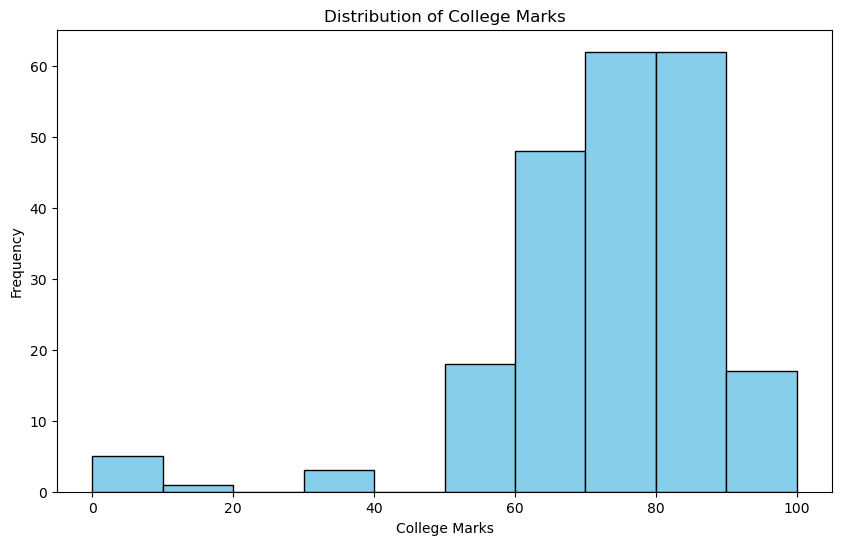

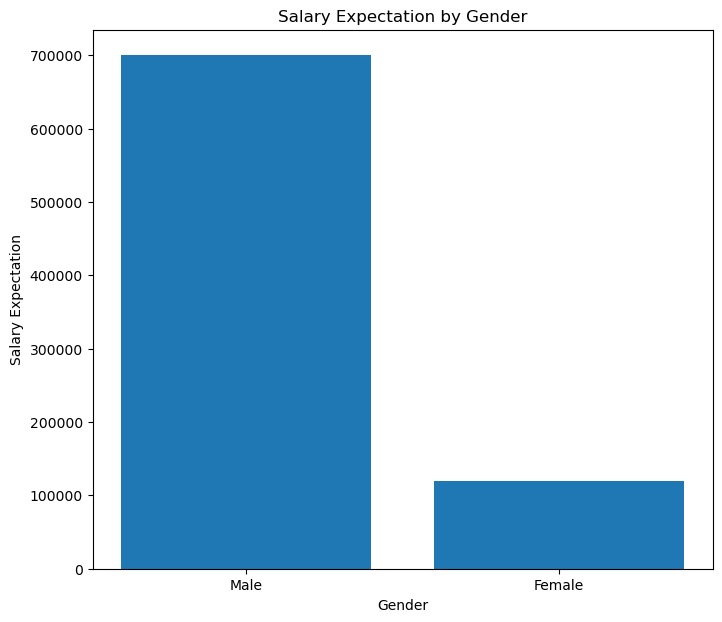

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.College Marks
plt.figure(figsize=(10,6))
plt.hist(df['college mark'], color='skyblue', edgecolor='black')
plt.title('Distribution of College Marks')
plt.xlabel('College Marks')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of Salary Expectations by Gender
plt.figure(figsize=(8,7))
plt.bar('Gender', 'salary expectation', data=df)
plt.title('Salary Expectation by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary Expectation')
plt.show()


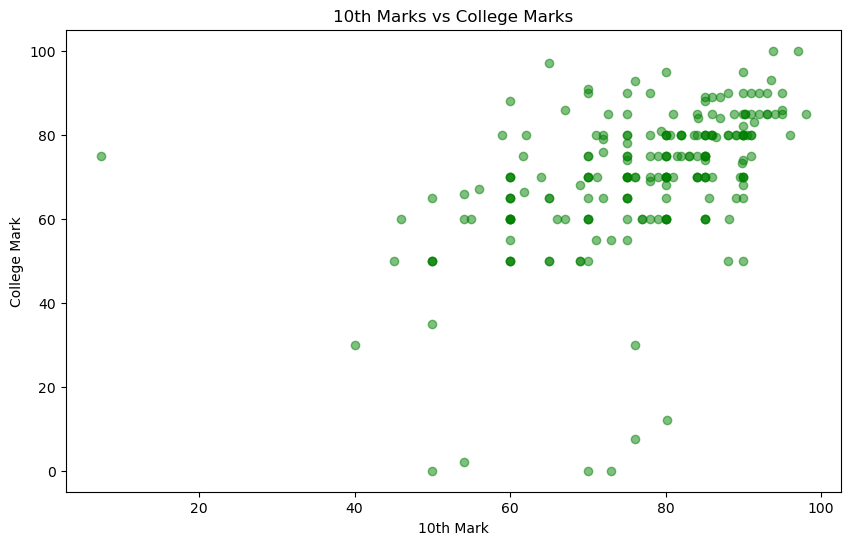

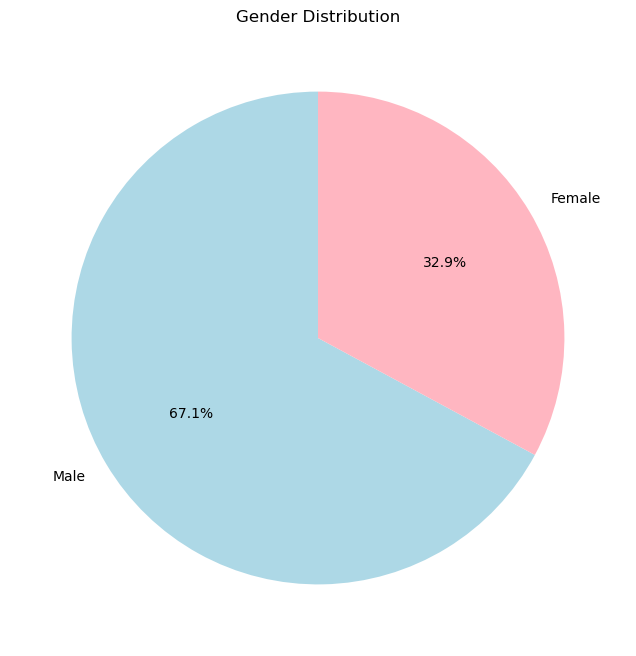

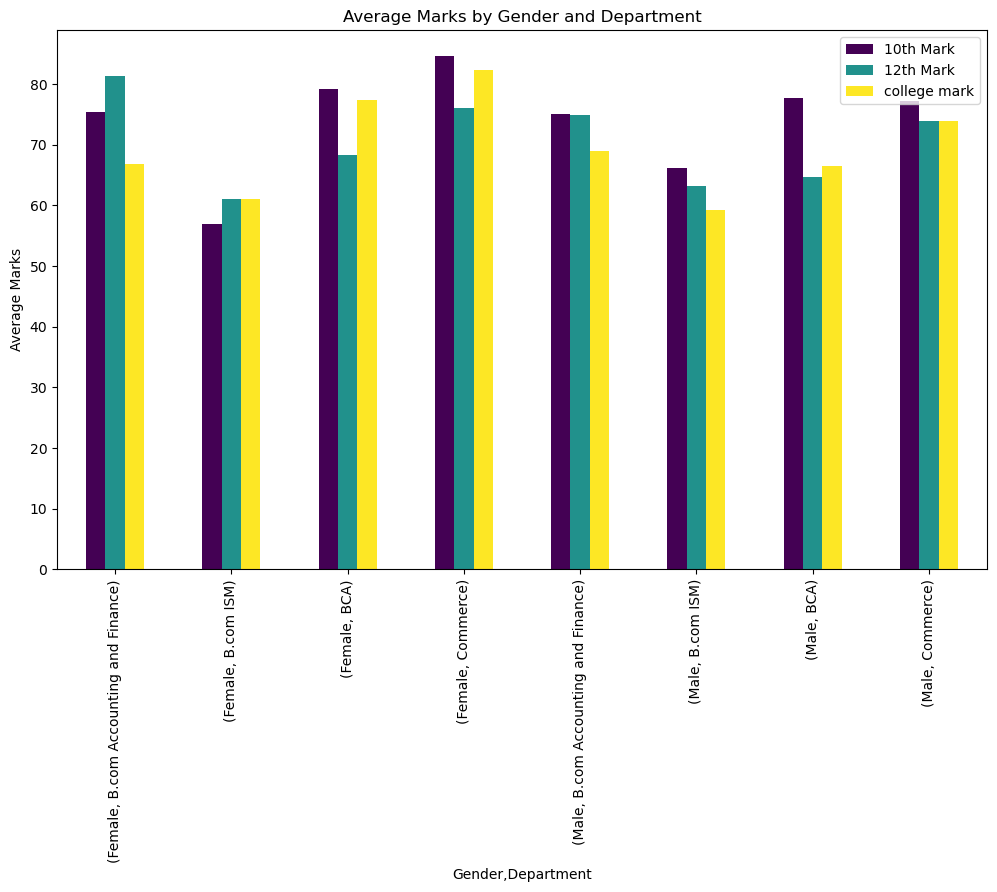

In [117]:
# 3. Scatter plot of 10th Marks vs College Marks
plt.figure(figsize=(10,6))
plt.scatter(df['10th Mark'], df['college mark'], c='green', alpha=0.5)
plt.title('10th Marks vs College Marks')
plt.xlabel('10th Mark')
plt.ylabel('College Mark')
plt.show()


#4 Pie Chart
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=90)
plt.title('Gender Distribution')
plt.show()

# 5. Bar plot showing the average marks by Gender and Department
avg_marks_by_gender_dept.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Average Marks by Gender and Department')
plt.ylabel('Average Marks')
plt.show()